Mastercamp TD project

Import all libraries

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
import geopandas as gpd
import geodatasets as gds
from mpl_toolkits.axes_grid1 import make_axes_locatable

Get Database 



In [52]:
data=next(pd.read_csv("data/valeursfoncieres-2023.txt",chunksize=3727007,sep="|",decimal=","))
data=data.drop(["Identifiant de document","Reference document","1 Articles CGI","2 Articles CGI","3 Articles CGI","4 Articles CGI","5 Articles CGI","Identifiant local","Type de voie","Voie","B/T/Q","Code voie","Code postal","Commune","No voie","Type local"],axis=1)
same=data.head(3)
diff=data.head(5)
print(data.head(1))

C:\Users\nico9\AppData\Local\Temp\ipykernel_9168\392265811.py:1: DtypeWarning: Columns (14,18,23,24,26,28,32,41) have mixed types. Specify dtype option on import or set low_memory=False.
  data=next(pd.read_csv("data/valeursfoncieres-2023.txt",chunksize=3727007,sep="|",decimal=","))


   No disposition Date mutation Nature mutation  Valeur fonciere  \
0               1    05/01/2023           Vente        1070000.0   

  Code departement  Code commune  Prefixe de section Section  No plan  \
0                1           354                 NaN      BD      334   

  No Volume  ... Surface Carrez du 4eme lot  5eme lot  \
0       NaN  ...                        NaN       NaN   

  Surface Carrez du 5eme lot  Nombre de lots Code type local  \
0                        NaN               1             3.0   

   Surface reelle bati  Nombre pieces principales  Nature culture  \
0                  0.0                        0.0             NaN   

  Nature culture speciale  Surface terrain  
0                     NaN              NaN  

[1 rows x 27 columns]


Signification des variables catégorielles


In [53]:
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"Valeurs uniques de {col}: {data[col].unique()}")

Valeurs uniques de Date mutation: ['05/01/2023' '03/01/2023' '06/01/2023' '04/01/2023' '09/01/2023'
 '10/01/2023' '02/01/2023' '12/01/2023' '13/01/2023' '16/01/2023'
 '11/01/2023' '14/01/2023' '18/01/2023' '17/01/2023' '19/01/2023'
 '20/01/2023' '24/01/2023' '23/01/2023' '25/01/2023' '26/01/2023'
 '30/01/2023' '27/01/2023' '31/01/2023' '01/02/2023' '02/02/2023'
 '28/01/2023' '03/02/2023' '07/02/2023' '09/02/2023' '06/02/2023'
 '08/02/2023' '10/02/2023' '13/02/2023' '14/02/2023' '21/01/2023'
 '15/02/2023' '16/02/2023' '17/02/2023' '21/02/2023' '20/02/2023'
 '22/02/2023' '23/02/2023' '24/02/2023' '27/02/2023' '28/02/2023'
 '18/02/2023' '02/03/2023' '01/03/2023' '03/03/2023' '07/03/2023'
 '06/03/2023' '08/03/2023' '09/03/2023' '25/02/2023' '10/03/2023'
 '13/03/2023' '11/03/2023' '14/03/2023' '15/03/2023' '16/03/2023'
 '17/03/2023' '20/03/2023' '21/03/2023' '22/03/2023' '18/03/2023'
 '23/03/2023' '24/03/2023' '27/03/2023' '28/03/2023' '25/03/2023'
 '29/03/2023' '30/03/2023' '31/03/2023' '0

Distribution des variables numériques

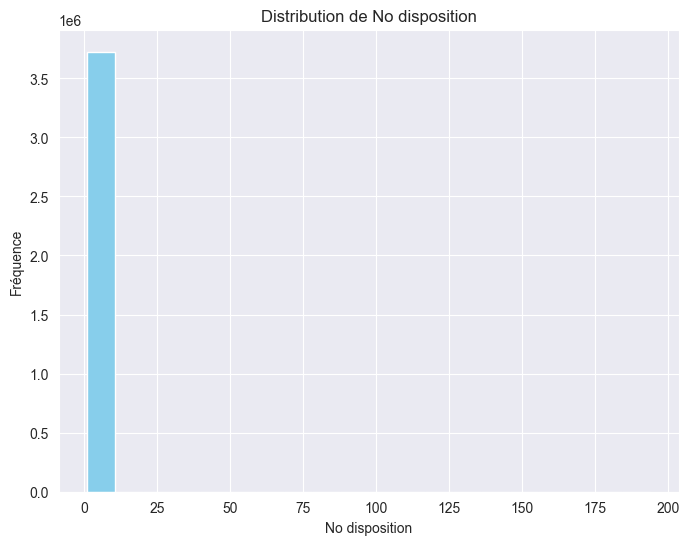

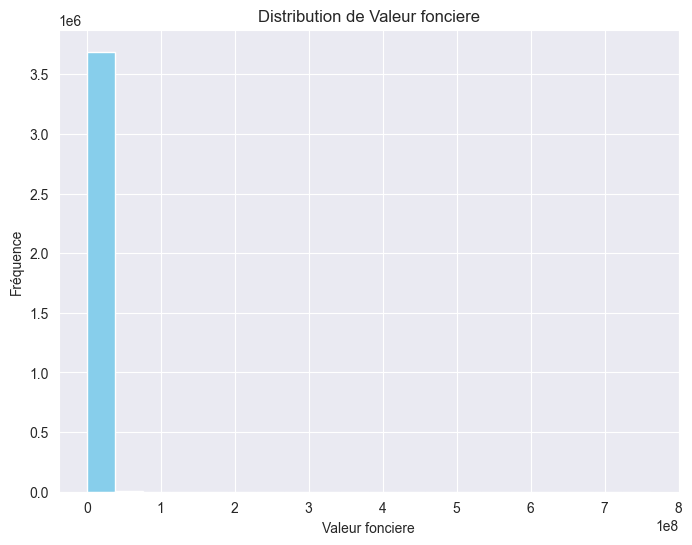

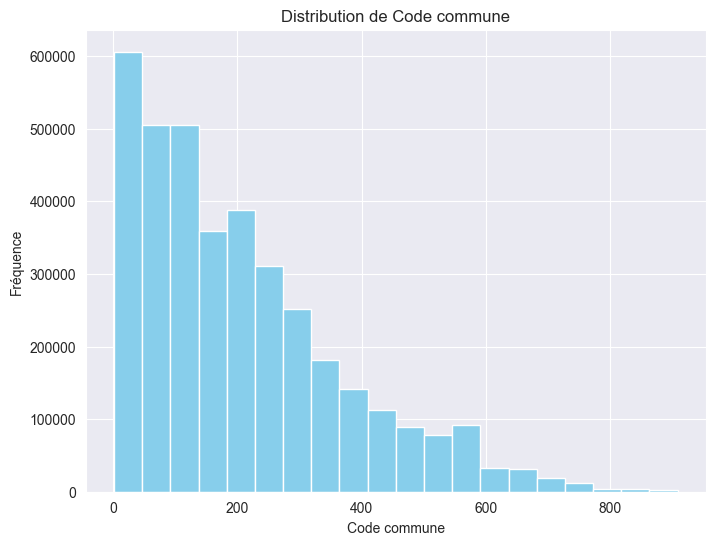

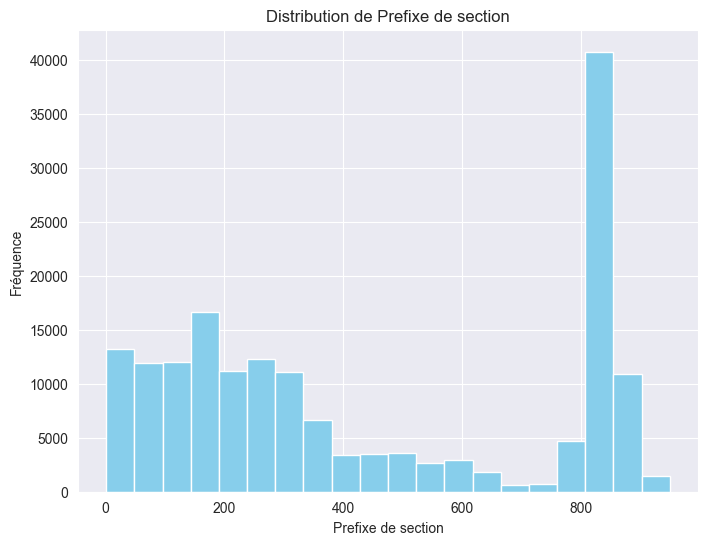

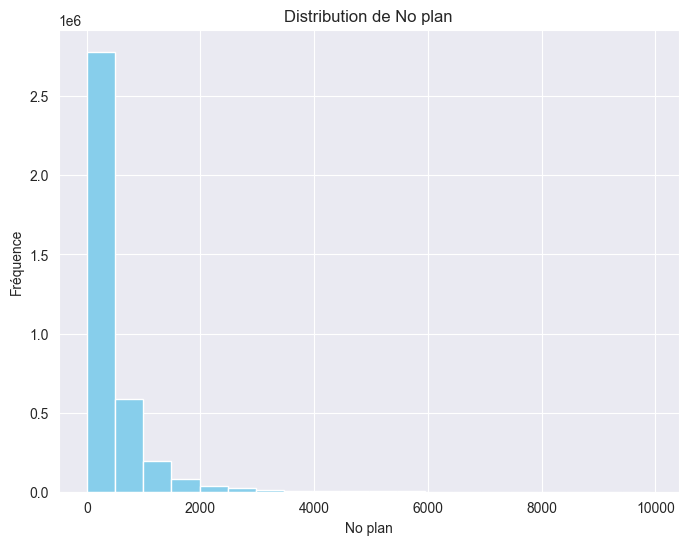

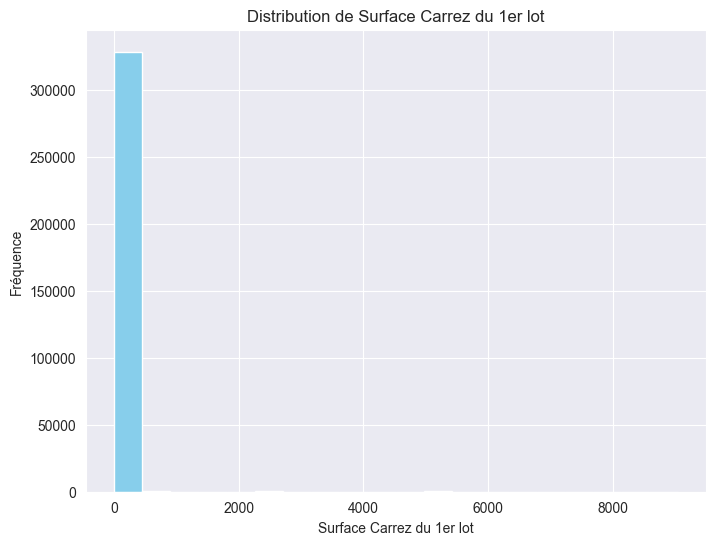

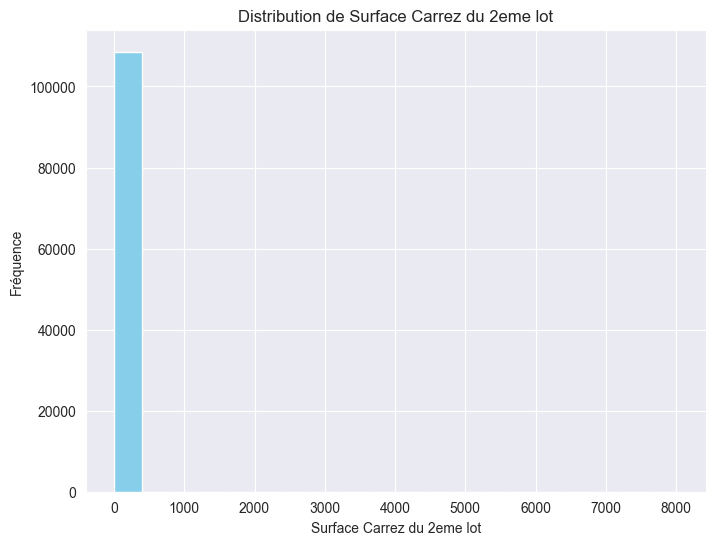

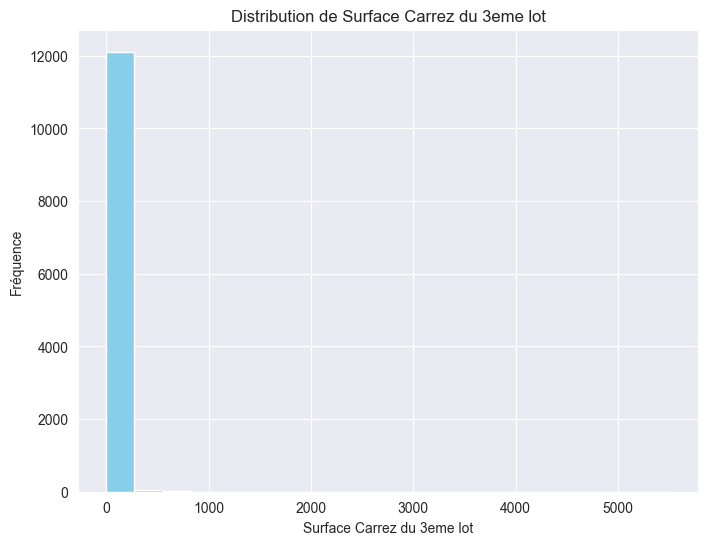

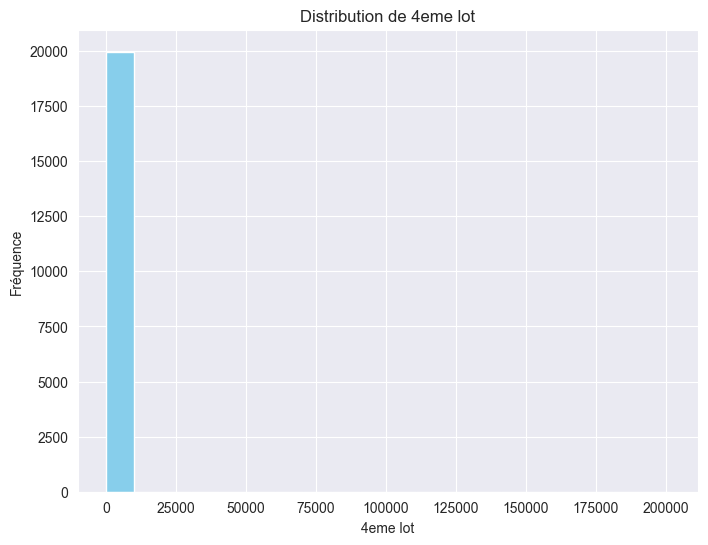

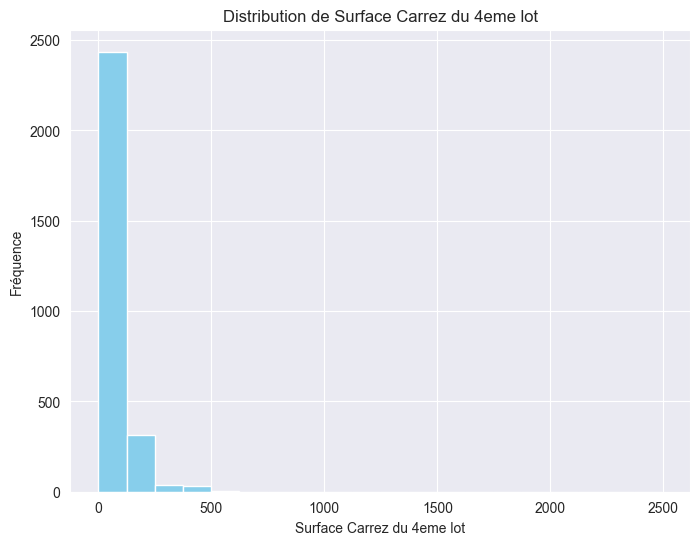

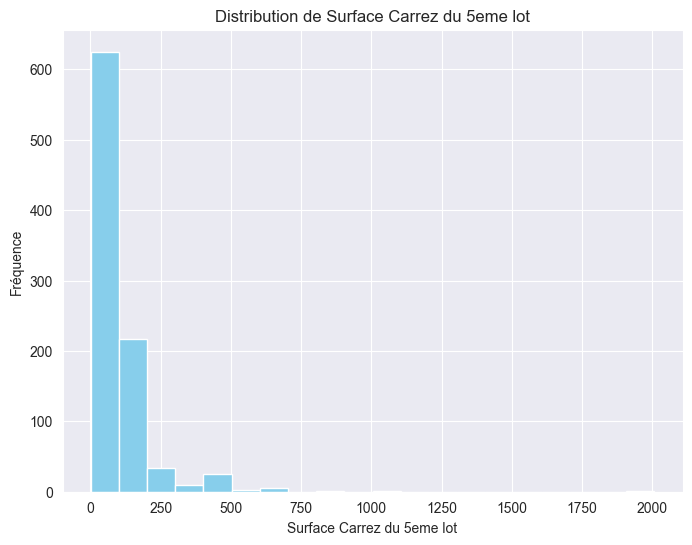

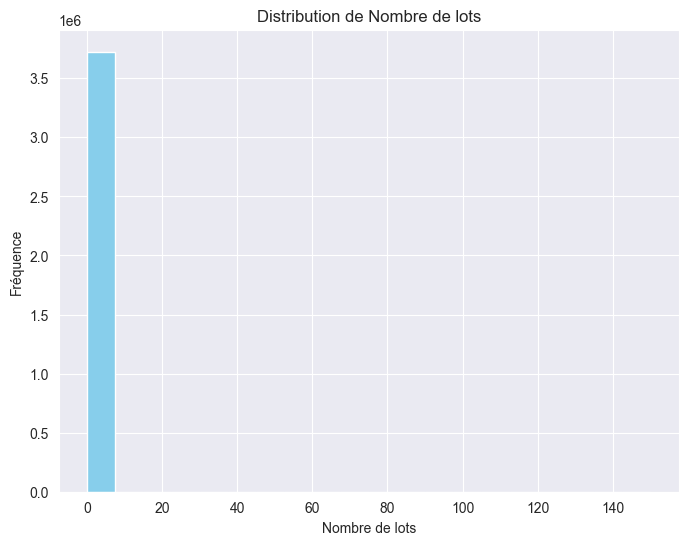

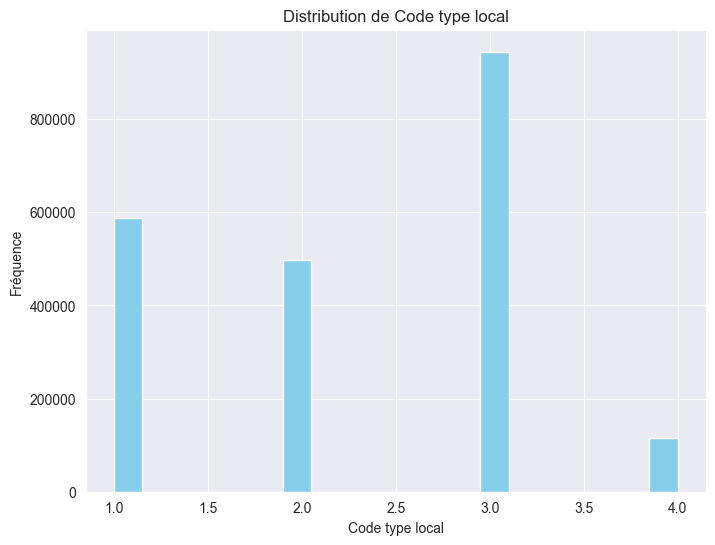

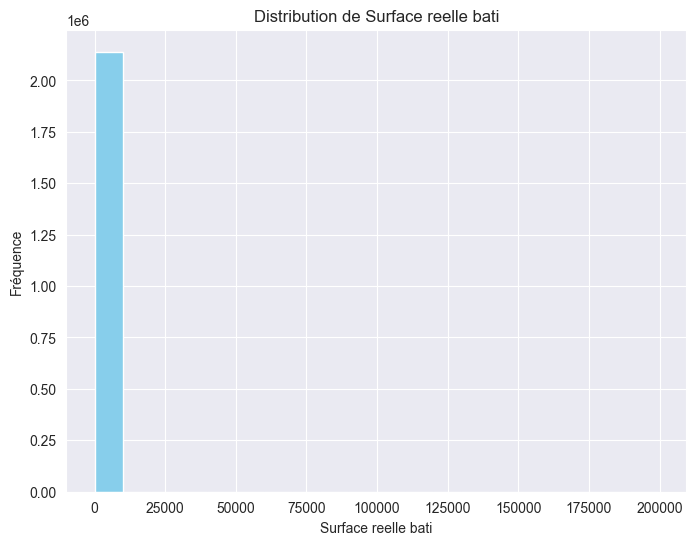

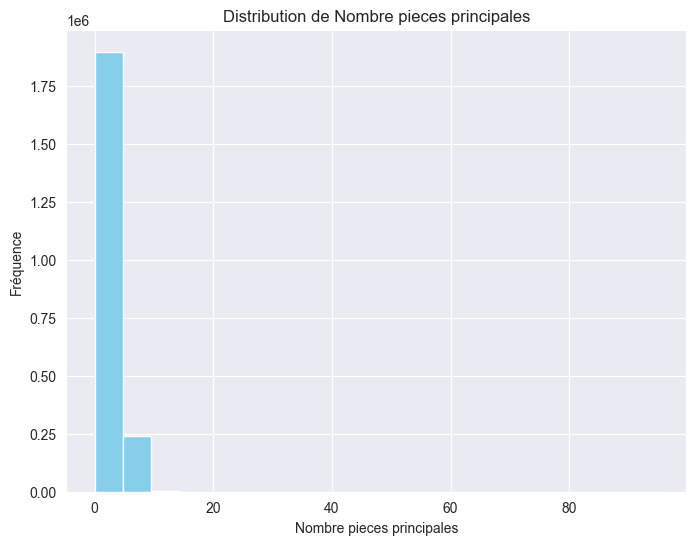

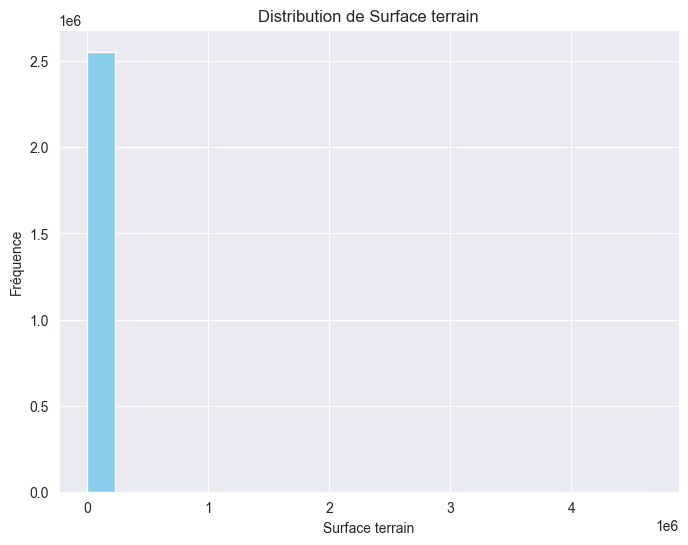

In [54]:
# Distribution des variables numériques
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    plt.hist(data[col], bins=20, color='skyblue')
    plt.title(f'Distribution de {col}')
    plt.xlabel(col)
    plt.ylabel('Fréquence')
    plt.show()

In [55]:
def compare_column_values(df):
    comparison_result = {}
    for column in df.columns:
        if df[column].nunique() == 1:
            comparison_result[column] = 'Same'
        else:
            comparison_result[column] = 'Different'
    return comparison_result

# Compare the values in the selected subset
comparison_result = compare_column_values(same)
print(comparison_result)
print(compare_column_values(diff))

{'No disposition': 'Same', 'Date mutation': 'Same', 'Nature mutation': 'Same', 'Valeur fonciere': 'Same', 'Code departement': 'Same', 'Code commune': 'Same', 'Prefixe de section': 'Different', 'Section': 'Same', 'No plan': 'Different', 'No Volume': 'Different', '1er lot': 'Different', 'Surface Carrez du 1er lot': 'Different', '2eme lot': 'Different', 'Surface Carrez du 2eme lot': 'Different', '3eme lot': 'Different', 'Surface Carrez du 3eme lot': 'Different', '4eme lot': 'Different', 'Surface Carrez du 4eme lot': 'Different', '5eme lot': 'Different', 'Surface Carrez du 5eme lot': 'Different', 'Nombre de lots': 'Same', 'Code type local': 'Different', 'Surface reelle bati': 'Different', 'Nombre pieces principales': 'Different', 'Nature culture': 'Different', 'Nature culture speciale': 'Different', 'Surface terrain': 'Different'}
{'No disposition': 'Same', 'Date mutation': 'Different', 'Nature mutation': 'Same', 'Valeur fonciere': 'Different', 'Code departement': 'Same', 'Code commune': '

Les types des datas

In [56]:
print(data.dtypes)

No disposition                  int64
Date mutation                  object
Nature mutation                object
Valeur fonciere               float64
Code departement               object
Code commune                    int64
Prefixe de section            float64
Section                        object
No plan                         int64
No Volume                      object
1er lot                        object
Surface Carrez du 1er lot     float64
2eme lot                       object
Surface Carrez du 2eme lot    float64
3eme lot                       object
Surface Carrez du 3eme lot    float64
4eme lot                      float64
Surface Carrez du 4eme lot    float64
5eme lot                       object
Surface Carrez du 5eme lot    float64
Nombre de lots                  int64
Code type local               float64
Surface reelle bati           float64
Nombre pieces principales     float64
Nature culture                 object
Nature culture speciale        object
Surface terr

In [57]:
desired_id="1354BD05/01/2023"
transaction_info = aggregated_data[aggregated_data['Id'] == desired_id]

# Display the information of the transaction
print(transaction_info)

      Code departement Code commune Prefixe de section Section Date mutation  \
10967                1          354                         BD    05/01/2023   

       Valeur fonciere  Surface_combined  Code type local                Id  
10967        1070000.0               0.0              2.0  1354BD05/01/2023  


In [58]:


desired_id="12AC09/01/2023"
code_departement="1"
code_commune="2"
Section="AC"
Date_mutation="09/01/2023"
transaction_info = data[data['Code departement'] == int(code_departement)]
transaction_info = transaction_info[transaction_info['Code commune'] == int(code_commune)]
transaction_info = transaction_info[transaction_info['Section'] == Section]
transaction_info = transaction_info[transaction_info['Date mutation'] == Date_mutation]

#transaction_info = data[data['Code commune'] == int(code_commune)]

print(transaction_info)



     No disposition Date mutation Nature mutation  Valeur fonciere  \
369               1    09/01/2023           Vente           1000.0   

    Code departement  Code commune  Prefixe de section Section  No plan  \
369                1             2                 NaN      AC      490   

    No Volume  ... Surface Carrez du 4eme lot  5eme lot  \
369       NaN  ...                        NaN       NaN   

    Surface Carrez du 5eme lot  Nombre de lots Code type local  \
369                        NaN               0             NaN   

     Surface reelle bati  Nombre pieces principales  Nature culture  \
369                  NaN                        NaN               P   

    Nature culture speciale  Surface terrain  
369                     NaN           2950.0  

[1 rows x 27 columns]


In [59]:
# On remplace les NaN par 0
data.fillna(0, inplace=True)

# On supprime les lignes où la surface totale est nulle
data = data[data['Surface reelle bati'] > 0]

# virer les lignes avec code type local = 0
data = data[data['Code type local'] != 0]

In [60]:
# Replace NaN values with empty strings for string columns
data['Code departement'] = data['Code departement'].fillna('')
data['Code commune'] = data['Code commune'].fillna('')
data['Prefixe de section'] = data['Prefixe de section'].fillna('')
data['Section'] = data['Section'].fillna('')
data['Date mutation'] = data['Date mutation'].fillna('')

# Convert necessary columns to appropriate data types
data['Surface terrain'] = data['Surface terrain'].astype(float)
data['Surface reelle bati'] = data['Surface reelle bati'].astype(float)

# Calculate combined surface
data['Surface_combined'] = data['Surface terrain'] + data['Surface reelle bati']

# Group by relevant columns and aggregate the data
aggregated_data = data.groupby(['Code departement', 'Code commune', 'Prefixe de section', 'Section', 'Date mutation']).agg({
    'Valeur fonciere': 'mean',
    'Surface_combined': 'sum',
    'Code type local': 'min'  
}).reset_index()

# Convert aggregated columns to appropriate data types
aggregated_data['Code departement'] = aggregated_data['Code departement'].astype(str)
aggregated_data['Code commune'] = aggregated_data['Code commune'].astype(str)
aggregated_data['Prefixe de section'] = aggregated_data['Prefixe de section'].astype(str)
aggregated_data['Section'] = aggregated_data['Section'].astype(str)
aggregated_data['Date mutation'] = aggregated_data['Date mutation'].astype(str)
aggregated_data['Valeur fonciere'] = aggregated_data['Valeur fonciere'].astype(float)

# Calculate Id
aggregated_data['Id'] = aggregated_data['Code departement'] + aggregated_data['Code commune'] + aggregated_data['Prefixe de section'] + aggregated_data['Section'] + aggregated_data['Date mutation']

# Print the first few rows to verify the result
print(aggregated_data.head())

  Code departement Code commune Prefixe de section Section Date mutation  \
0                1            1                0.0       A    13/11/2023   
1                1            1                0.0      ZC    01/12/2023   
2                1            1                0.0      ZH    07/06/2023   
3                1            1                0.0      ZH    19/01/2023   
4                1            1                0.0      ZH    21/03/2023   

   Valeur fonciere  Surface_combined  Code type local                 Id  
0         420000.0            3266.0              1.0   110.0A13/11/2023  
1         155000.0            2853.0              1.0  110.0ZC01/12/2023  
2         210000.0            1057.0              1.0  110.0ZH07/06/2023  
3         270000.0            1673.0              1.0  110.0ZH19/01/2023  
4         240000.0            1045.0              1.0  110.0ZH21/03/2023  


Valeur foncière moyenne par type de propriété


In [61]:
# Group by type and calculate average value
average_values_by_type = data.groupby('Code type local')['Valeur fonciere'].mean()

print(average_values_by_type)

Code type local
1.0    3.247068e+05
2.0    9.232499e+05
3.0    7.500000e+03
4.0    2.063338e+06
Name: Valeur fonciere, dtype: float64


Valeur foncière moyenne par département pour les trois premiers départements

In [62]:
# Group by type and calculate average value
average_values_by_departement = aggregated_data.groupby('Code departement')['Valeur fonciere'].mean()

print(average_values_by_departement)

Code departement
1      285730.078424
10     160279.160791
11     168210.209315
12     148830.252598
13     341002.566575
           ...      
95     338121.982268
971    344812.444268
972    263208.938370
973    281351.330957
974    281003.142363
Name: Valeur fonciere, Length: 97, dtype: float64


Interprétations et visualisations 


Prix moyen par mètre carré par département pour les trois premiers départements


In [63]:
data['Prix_m2'] = data['Valeur fonciere'] / data['Surface reelle bati']

In [90]:
avg_price_per_department = data.groupby('Code departement')['Prix_m2'].median().reset_index()
avg_price_per_department


,Code departement,Prix_m2
0,1,2650.000000
1,2,1370.967742
2,3,1333.333333
3,4,2453.290578
4,5,2857.000000
...,...,...
94,974,3200.000000
95,29,2179.349951
96,2A,4339.285714
97,2B,3235.767059


In [91]:
sf = gpd.read_file('france-geojson/departements-version-simplifiee.geojson')
sf

,code,nom,geometry
0,01,Ain,"POLYGON ((4.78021 46.17668, 4.79458 46.21832, ..."
1,02,Aisne,"POLYGON ((4.04797 49.40564, 4.03991 49.39740, ..."
2,03,Allier,"POLYGON ((3.03207 46.79491, 3.04907 46.75808, ..."
3,04,Alpes-de-Haute-Provence,"POLYGON ((5.67604 44.19143, 5.69209 44.18648, ..."
4,05,Hautes-Alpes,"POLYGON ((6.26057 45.12685, 6.29922 45.10855, ..."
...,...,...,...
91,91,Essonne,"POLYGON ((2.22656 48.77610, 2.23298 48.76620, ..."
92,92,Hauts-de-Seine,"POLYGON ((2.29097 48.95097, 2.32697 48.94536, ..."
93,93,Seine-Saint-Denis,"POLYGON ((2.55306 49.00982, 2.58031 48.99159, ..."
94,94,Val-de-Marne,"POLYGON ((2.33190 48.81701, 2.36395 48.81632, ..."


In [99]:
sf['code'] = sf['code'].apply(lambda x: x.zfill(2) if x.isdigit() else x)
avg_price_per_department['Code departement'] = avg_price_per_department['Code departement'].apply(lambda x: x.zfill(2) if x.isdigit() else x)

# Jointure des deux dataframes sur la colonne 'code' et 'Code departement'
df_merged = pd.merge(sf, avg_price_per_department[['Code departement', 'Prix_m2']], left_on='code', right_on='Code departement', how='left')


# Affichage du dataframe fusionné
df_merged

,code,nom,geometry,Code departement,Prix_m2
0,01,Ain,"POLYGON ((4.78021 46.17668, 4.79458 46.21832, ...",01,2650.000000
1,02,Aisne,"POLYGON ((4.04797 49.40564, 4.03991 49.39740, ...",02,1370.967742
2,03,Allier,"POLYGON ((3.03207 46.79491, 3.04907 46.75808, ...",03,1333.333333
3,04,Alpes-de-Haute-Provence,"POLYGON ((5.67604 44.19143, 5.69209 44.18648, ...",04,2453.290578
4,05,Hautes-Alpes,"POLYGON ((6.26057 45.12685, 6.29922 45.10855, ...",05,2857.000000
...,...,...,...,...,...
93,91,Essonne,"POLYGON ((2.22656 48.77610, 2.23298 48.76620, ...",91,3231.837194
94,92,Hauts-de-Seine,"POLYGON ((2.29097 48.95097, 2.32697 48.94536, ...",92,7454.545455
95,93,Seine-Saint-Denis,"POLYGON ((2.55306 49.00982, 2.58031 48.99159, ...",93,4039.531250
96,94,Val-de-Marne,"POLYGON ((2.33190 48.81701, 2.36395 48.81632, ...",94,5735.294118


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
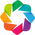

:Polygons   [Longitude,Latitude]   (code,Prix_m2)

In [123]:
import geoviews as gv

gv.extension('bokeh')
deps = gv.Polygons(df_merged, vdims=['code','Prix_m2'])
from geoviews import dim
deps.opts(width=600, height=600, toolbar='above', color=dim('Prix_m2'),
          colorbar=True , cmap = 'turbo', tools=['hover'], aspect='equal')

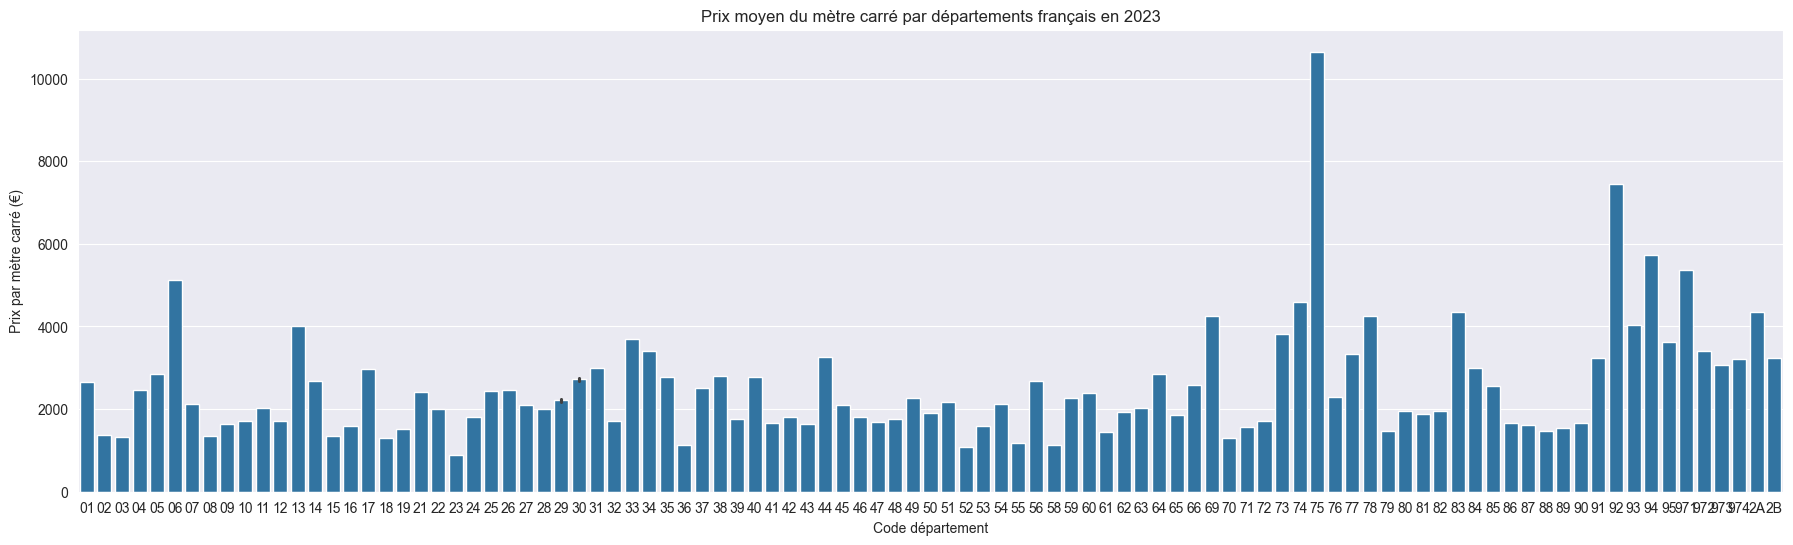

In [126]:
plt.figure(figsize=(22, 6))
sns.barplot(x='Code departement', y='Prix_m2', data=avg_price_per_department)
plt.title('Prix moyen du mètre carré par départements français en 2023')
plt.xlabel('Code département')
plt.ylabel('Prix par mètre carré (€)')
plt.show()



Prix moyen par mètre carré par type de propriété


In [127]:
avg_price_by_type = data.groupby('Code type local')['Prix_m2'].mean().reset_index()

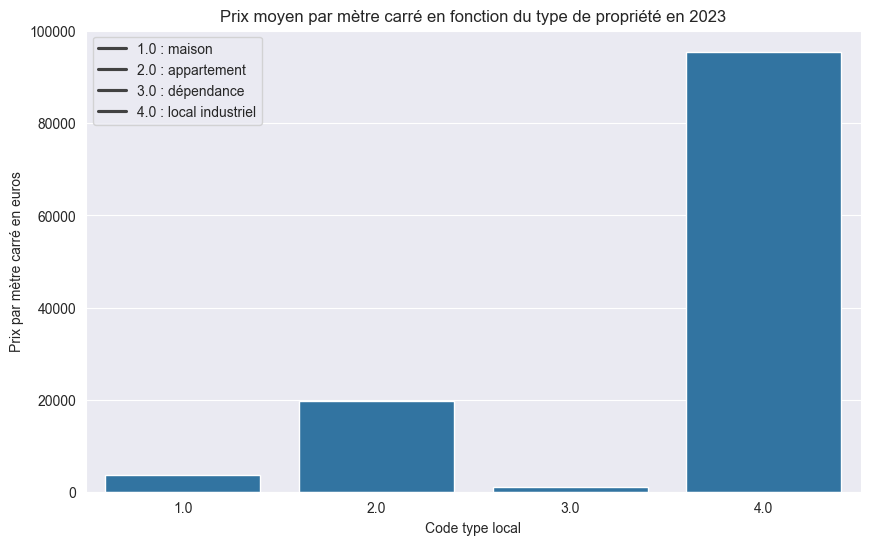

In [128]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Code type local', y='Prix_m2', data=avg_price_by_type)
plt.title('Prix moyen par mètre carré en fonction du type de propriété en 2023')
plt.xlabel('Code type local')
plt.ylabel('Prix par mètre carré en euros')
plt.legend(['1.0 : maison',
           '2.0 : appartement',
           '3.0 : dépendance',
           '4.0 : local industriel'], loc = "upper left")
plt.show()

Matrice de corrélation entre les variables


In [129]:
correlation_matrix = data[['Valeur fonciere', 'Nombre pieces principales', 'Nombre de lots','Code type local', 'Surface_combined', 'Prix_m2']].corr()

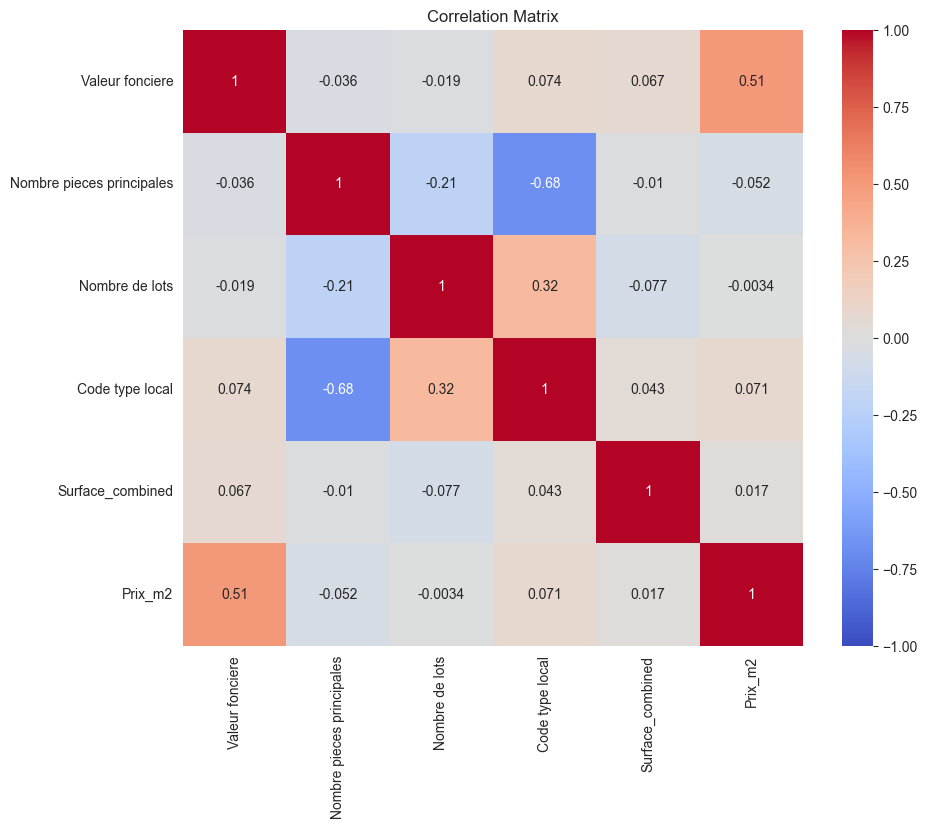

In [130]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()